In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sn.set(style="white")
sn.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv("final_cleaned_spotify.csv")
df = pd.DataFrame(data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexes/base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


                    pop_artist    Top100  artist_already_pop
acousticness         -0.110243 -0.078900           -0.071132
danceability          0.045717  0.076287            0.026778
duration_ms          -0.036074 -0.003137           -0.012595
energy                0.070550  0.059368            0.048454
explicit             -0.066151  0.000981           -0.011545
instrumentalness     -0.126552 -0.065924           -0.074140
key                  -0.005933  0.002188            0.000939
liveness              0.006802 -0.027791           -0.013611
loudness              0.082104  0.067425            0.061587
mode                  0.034550 -0.002691            0.016060
popularity            0.104012  0.150082            0.131243
speechiness          -0.095333 -0.022896           -0.051161
tempo                 0.038452  0.010403            0.023864
valence               0.066139  0.049419            0.017375
year                  0.017607  0.056625            0.089107
pop_artist            1.

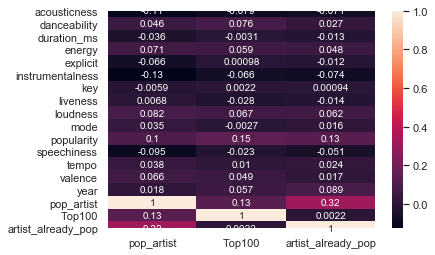

In [3]:
#correlation
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.drop(correlation_matrix.columns[[range(15)]], axis=1)
print (correlation_matrix)

min_diff = st.norm.ppf(.975)

matrix_shape = correlation_matrix.shape
height = matrix_shape[0]
width = matrix_shape[1]

significance_top_100 = 0
significance_pop_artist = 0
total_features = height

sn.heatmap(correlation_matrix, annot=True)
plt.show()

In [4]:
#logistic regression
#top 7 features
top_7_features = df.drop(df.columns[[0, 1, 4, 6, 8, 10, 11, 12, 14, 16, 17, 18, 19]], axis=1)
top100 = df[['Top100']]
logreg = sm.Logit(top100, top_7_features).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.120590
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Top100   No. Observations:               137014
Model:                          Logit   Df Residuals:                   137007
Method:                           MLE   Df Model:                            6
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                 0.02306
Time:                        14:24:51   Log-Likelihood:                -16523.
converged:                       True   LL-Null:                       -16913.
Covariance Type:            nonrobust   LLR p-value:                3.098e-165
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness        -3.1087      0.058    -53.744      0.000      -3.222      -2.995
danceabili

In [6]:
#interaction terms w OLS
first_interaction = smf.ols(formula='top100 ~ acousticness * liveness', data=df).fit()
print(first_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                 top100   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     339.0
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          2.25e-219
Time:                        14:25:14   Log-Likelihood:                 55904.
No. Observations:              137014   AIC:                        -1.118e+05
Df Residuals:                  137010   BIC:                        -1.118e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.05

In [7]:
#log reg with popularity too
top_7_and_pop = df.drop(df.columns[[0, 1, 4, 6, 8, 10, 11, 12, 14, 16, 17, 18]], axis=1)
logreg = sm.Logit(top100, top_7_and_pop).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.120446
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Top100   No. Observations:               137014
Model:                          Logit   Df Residuals:                   137006
Method:                           MLE   Df Model:                            7
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                 0.02423
Time:                        14:25:41   Log-Likelihood:                -16503.
converged:                       True   LL-Null:                       -16913.
Covariance Type:            nonrobust   LLR p-value:                1.054e-172
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
acousticness          -3.0905      0.058    -53.389      0.000      -3.204      -2.977
danc